<p> This executable paper is a part of the course project for the Photonics (PH-421) course. </p>

<h1> Topological Optical Parametic Oscillation </h1>

<p style="color:DarkGrey"><i> Group-10: Anurag Abhijit Pendse, Devashish Shah, Mehul Vijay Chanda, Sagnik Banerjee, Shashwat Chakraborty</i></p>

<h3> Abstract: </h3> 
<p style='text-align:justify;'>    
Topological insulators possess protected boundary states which are robust against disorders and have immense implications in both fermionic and bosonic systems. Harnessing these topological effects in nonequilibrium scenarios is highly desirable and has led to the development of topological lasers. The topologically protected boundary states usually lie within the bulk bandgap, and selectively exciting them without inducing instability in the bulk modes of bosonic systems is challenging.
The paper being analyzed considers topological parametrically driven nonlinear resonator arrays that possess complex eigenvalues only in the edge modes in spite of the uniform pumping. We reproduce the results showing that parametric oscillation occurs in the topological boundary modes of one and two dimensional systems. Furthermore, we demonstrate squeezing dynamics below the oscillation threshold, where the quantum properties of the topological edge modes are robust against certain disorders. The aim is to shed light on the dynamics of weakly nonlinear topological systems driven out-of-equilibrium and to reveal their intriguing behavior in the quantum regime.</p>

<h3>Introduction:</h3>
<p style='text-align:justify;'>
The role of topological invariance in characterizing materials has been one of the most well investigated domain in condensed matter physics. Of prime interest is the presence of protected edge modes in topological states of matter which inherit their robustness from the nontrivial topology of the bulk. Such edge states are disntintly characterised by nontrivial topological invariants (such as Chern and winding numbers). Since the advent of topological insulators in 2007, which behave as insulators in the bulk but have conducting edge and surface states on the boundary, much research have been carried out to study the interaction of such novel materials with light. This comes under the purview of Topological Photonics, which  highlights how topological effects can be realized in photonic crystals, coupled resonators, metamaterials and quasicrystals.
</p>
<p style='text-align:justify;'>
In this work, we show topological optical paramatric oscillation in a network of quadratic nonlinear resonators where the underlying Hamiltonian is topological, due to which the system possesses nontrivial topological invariants and host edge states. The system is driven in a regime where the edge states exhibit instability under uniform excitation from the pump signal. We demonstrate edge mode parametric oscillations  in both 1D and 2D topological insulators as well as corner mode parametric oscillation in a higher order topological insulator. Finally we investigate the generation of squeezed states of light below the oscillation threshold which are stable against perturbations arising from symmetry preserving disorders. 
</p>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
from matplotlib.legend_handler import HandlerTuple
import math
import qutip as qp

matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (18, 6)
matplotlib.rcParams['lines.markersize'] = 4

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Function used for calculating norms of complex numbers
def mod_sq(a):
    return a.imag**2+a.real**2 

<p style='text-align:justify;'>Three condensed matter physicists, Wu-Pei Su, John Robert Schrieffer, and Alan J. Heeger, discovered topological phases in 1979 to explain the electrical conductivity properties of polyacetylene. Hence, several analogous one-dimensional chains of atoms with two different nearest-neighbor couplings are described by the SSH (Su-Schrieffer-Heeger) model. There have been extensions of the 1D SSH chain model to higher dimensions which we will explore subsequently.</p>

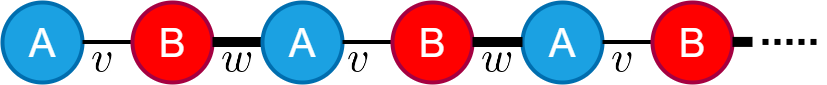
<p style='text-align:center;'>1D SSH Chain</p>

<p style='text-align:justify;'>The electrical conductivity of SSH chains has been studied in great depth in condensed matter physics. In this case, the lattice sites are occupied by electrons (Fermions). We will refer to it as the Fermionic SSH model. Consider a system with $N$ lattice sites coupled to their nearest neighbors. Let the two coupling strengths be $v$ and $w$. We can write down the second-quantized Hamiltonian of the system using the creation and annihilation operators as follows. </p>

\begin{equation*}
H = \sum_{n\in N_{odd}} v \cdot(a^{\dagger}_{n+1} a_n + a^{\dagger}_n a_{n+1}) + \sum_{n \in N_{even}} w \cdot(a^{\dagger}_{n+1} a_n + a^{\dagger}_n a_{n+1}) 
\end{equation*}
Here,<br> 
$N_{Odd} \equiv \{1,3,5 \cdots\}$<br>
$N_{Even} \equiv \{2,4, 6, \cdots\}$

We can rewrite the Hamiltonian and hence the time-independent Schrodinger equation in the matrix form as follows:
\begin{equation}
    H = \begin{bmatrix} 
    0 & v & 0 & \dots  & 0 \\
    v & 0 & w &        & \vdots \\
    0 & w & 0 & & \vdots \\
    \vdots & & & \ddots & \\  
    0 & \dots & \dots &  & 0\\
    \end{bmatrix}
\end{equation}
<br>
\begin{equation}
    H_{N\times N}\psi_{N\times 1}=E\psi_{N\times 1}
\end{equation}

<p style='text-align:justify;'>
Let's consider the cases of even and odd $N$ separately. When $N$ is even, there are two regimes based on the value relative magnitudes of $v$ and $w$, namely, the trivial (when $w < v$) and topological (when $w>v$) phases. Topologically protected edge states lie in the bulk band gap. </p>
<p style='text-align:justify;'>
We can intuitively visualize the two regimes by considering the extreme cases: fully dimerized limits. In the trivial case, when $w = 0$, all the lattice points are paired up. Hence we don't get any isolated edge sites. In the topological case, when $v=0$, we see two isolated lattice sites. Therefore we see two edge states.  </p>

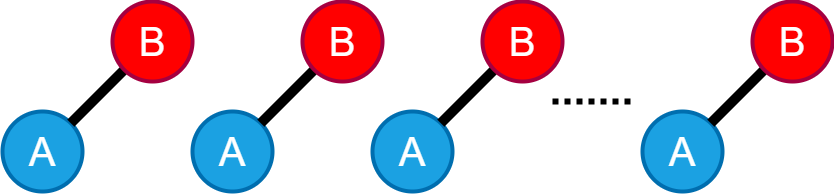

<p style="text-align: center;">
    Fully dimerised limit in the trivial regime (N = even)
</p>

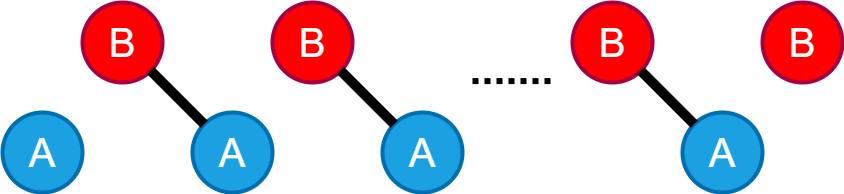

<p style="text-align: center;">
    Fully dimerised limit in the topological regime (N = even)
</p>

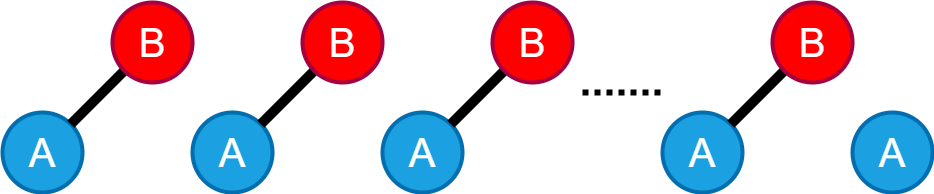
<p style="text-align: center;">
    Fully dimerised limit for odd N
</p>

### Fermionic 1D SSH Chain

<div>
<img src="attachment:Kagome.png" width="300"/>
</div>

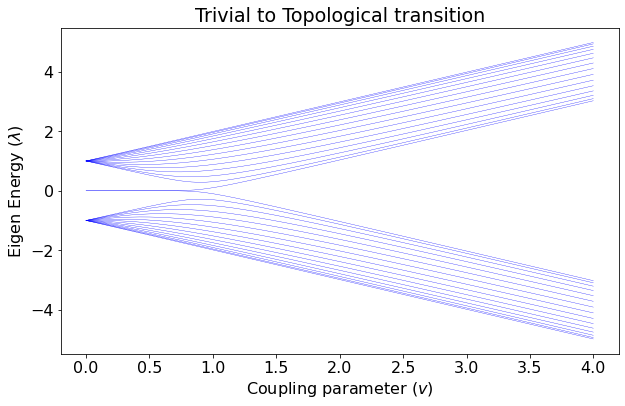

In [3]:
w = 1
v_space = 400
v=np.linspace(0,4,v_space)
e_vec_arr = []
N = 15
M = 2*N
m = [[0 for j in range(M)] for i in range(M)]
e=[]
for v_i in v:
    for r in range(0,M):
        for c in range(0,M):
            if (r%2 == 0 and c == r+1) or (c%2 == 0 and r == c+1): 
                m[r][c] = v_i
            elif (r%2 != 0 and c == r+1) or (c%2 != 0 and r == c+1):
                m[r][c] = w
    H = qp.Qobj(m)
    e_val, e_vec = H.eigenstates()
    e.append(e_val) 
    e_vec_arr.append(e_vec)
e_2 = [[0 for j in range(v_space)] for i in range(M)]
for k in range(v_space):
    for l in range(M):
        e_2[l][k] = e[k][l]

fig = plt.figure(figsize = (10, 6))
for n in range(M):
    plt.title('Trivial to Topological transition')
    plt.xlabel('Coupling parameter ($v$)')
    plt.ylabel('Eigen Energy ($\lambda$)')
    plt.plot(v, e_2[n], color='blue', linewidth = 0.3)   

Having seen the transition from the trivial to topological regimes, we now proceed to plot the eigenvalue spectrum and intensities for the open chain boundary condition.

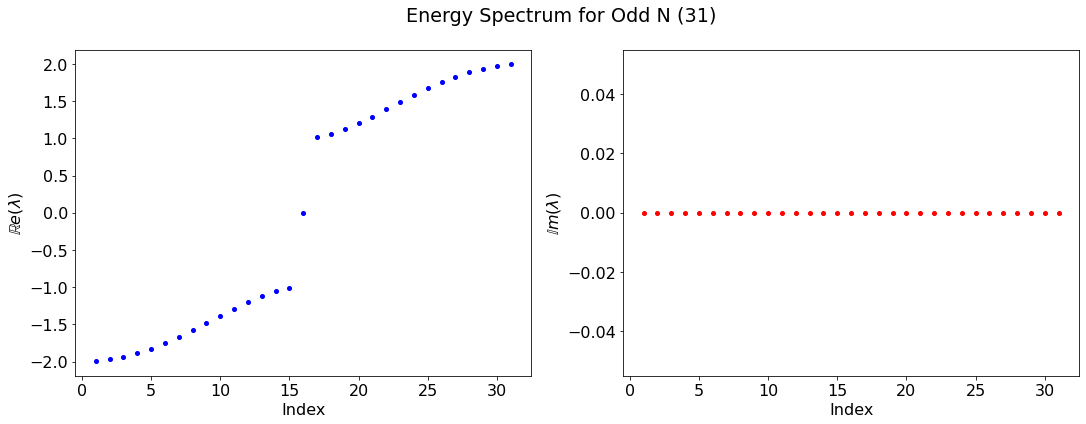

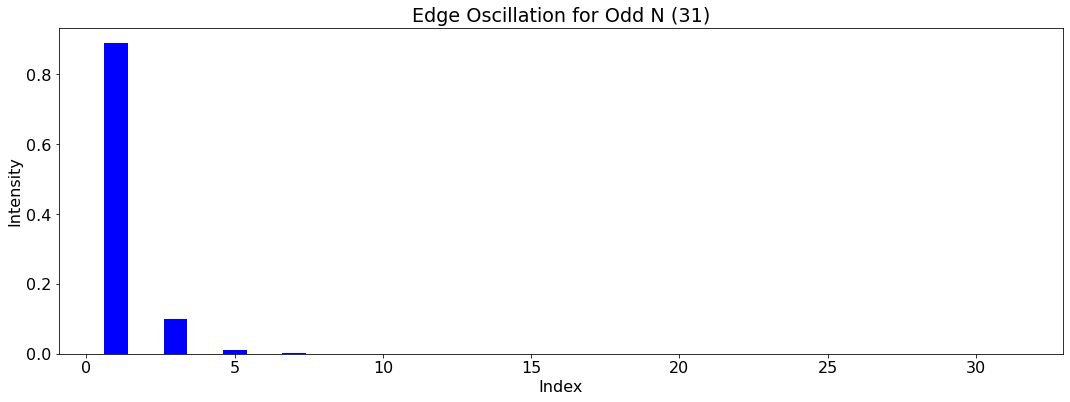

In [4]:
# Calculating the eigenvectors and eigenvalues of the Hamiltonian for the case of odd N 
w = 1.5 #J(1+epsilon)
v = 0.5 #J(1-epsilon)
N = 31
m = [[0 for j in range(N)] for i in range(N)]

for r in range(0,N):
    for c in range(0,N):
        if (r%2 == 0 and c == r+1) or (c%2 == 0 and r == c+1): 
            m[r][c] = v
        elif (r%2 != 0 and c == r+1) or (c%2 != 0 and r == c+1):
            m[r][c] = w
H = qp.Qobj(m)
H_eval, H_vec = H.eigenstates()

# Plotting real and imaginary parts of the eigenvalues of the Hamiltonian
e_val_Im=[]
for i in H_eval:
    e_val_Im.append(i.imag)
f = plt.figure()
f.suptitle('Energy Spectrum for Odd N ('+str(N)+')')
plt.subplot(1, 2, 1)
plt.scatter(np.linspace(1,N,N), H_eval, color='blue')
plt.xlabel('Index')
plt.ylabel('$\mathbb{R}e(\lambda)$')
plt.subplot(1, 2, 2)
plt.scatter(np.linspace(1,N,N), e_val_Im, color='red')
plt.xlabel('Index')
plt.ylabel('$\mathbb{I}m(\lambda)$')
plt.show()

norm_a = [0 for i in range(0,N)]
norm_b = [0 for i in range(0,N)]
# Since only one zero eigenvalue exists, we can consider the eigenvector corresponding to it 
# In case of multiple zero energy eigenstates we sum over all these states
vec = H_vec[15]
for i in range(N):
    a = vec[i]
    if i%2 == 0:
        norm_a[i] += mod_sq(a)
    else:
        norm_b[i] += mod_sq(a)

plt.bar(np.linspace(1,N,N), norm_a, color='blue')
plt.bar(np.linspace(1,N,N), norm_b, color='red')
plt.title('Edge Oscillation for Odd N ('+str(N)+')')
plt.xlabel('Index')
plt.ylabel('Intensity')
plt.show()

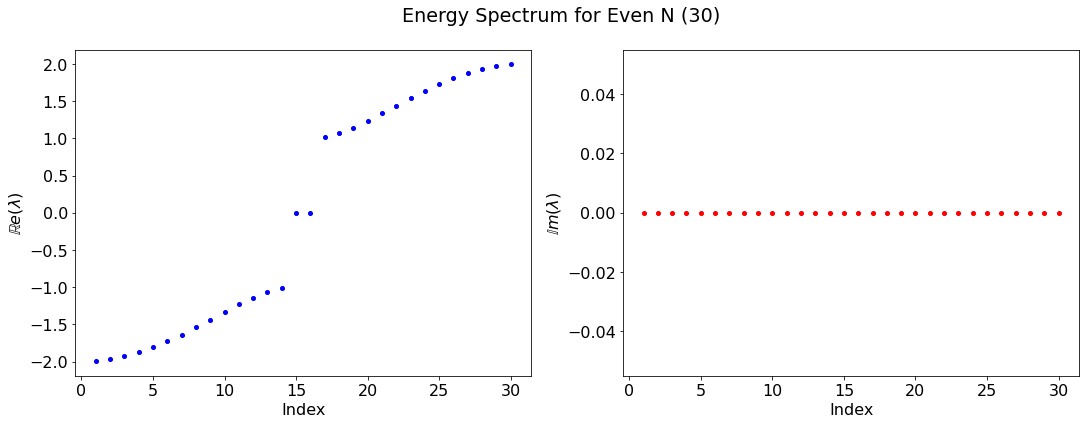

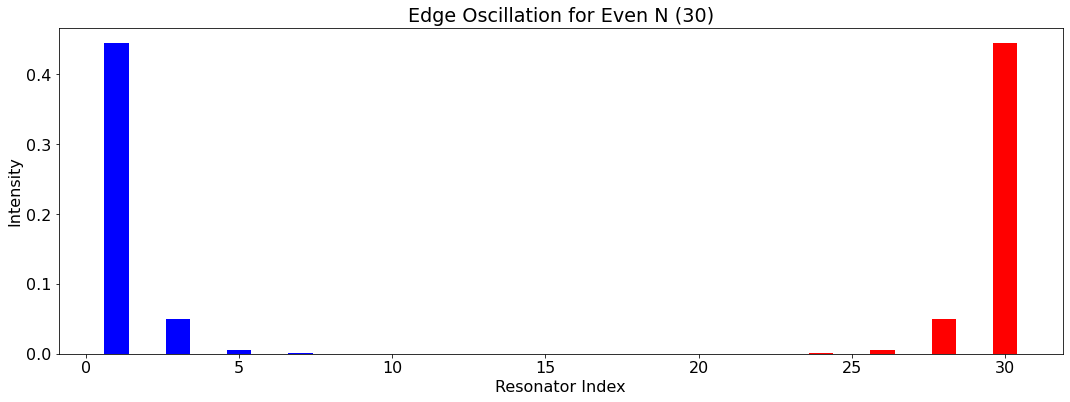

In [5]:
#Calclulating the eigenvectors and eigenvalues for the Hamiltonian for the case of even N
w = 1.5 #J(1+epsilon)
v = 0.5 #J(1-epsilon)
N = 30
m = [[0 for j in range(N)] for i in range(N)]

for r in range(0,N):
    for c in range(0,N):
        if (r%2 == 0 and c == r+1) or (c%2 == 0 and r == c+1): 
            m[r][c] = v
        elif (r%2 != 0 and c == r+1) or (c%2 != 0 and r == c+1):
            m[r][c] = w
H = qp.Qobj(m)
H_eval, H_vec = H.eigenstates()

#plotting real and imaginary parts of the eigenvalues
e_val_Im=[]
for i in H_eval:
    e_val_Im.append(i.imag)
f = plt.figure()
f.suptitle('Energy Spectrum for Even N ('+str(N)+')')
plt.subplot(1, 2, 1)
plt.scatter(np.linspace(1,N,N), H_eval, color='blue')
plt.xlabel('Index')
plt.ylabel('$\mathbb{R}e(\lambda)$')
plt.subplot(1, 2, 2)
plt.scatter(np.linspace(1,N,N), e_val_Im, color='red')
plt.xlabel('Index')
plt.ylabel('$\mathbb{I}m(\lambda)$')
plt.show()

norm_a = [0 for i in range(0,N)]
norm_b = [0 for i in range(0,N)]
for j in range(15,16): # Since only one zero eigenvalue exists, we can consider the eigenvector corresponding to it 
    vec = H_vec[j]
    for i in range(N):
        a = vec[i]
        if i%2 == 0:
            norm_a[i]+=a[0][0]
        else:
            norm_b[i]+=a[0][0]
for i in range(N):
    norm_a[i] = mod_sq(norm_a[i])
    norm_b[i] = mod_sq(norm_b[i])
plt.bar(np.linspace(1,N,N), norm_a, color='blue')
plt.bar(np.linspace(1,N,N), norm_b, color='red')
plt.title('Edge Oscillation for Even N ('+str(N)+')')
plt.xlabel('Resonator Index')
plt.ylabel('Intensity')
plt.show()

The boundary states obtained in topological insulators also have immense implications in Bosonic systems. But as we know, bosons do not follow Pauli's exclusion principle and, thus, tend to condense to the lowest bulk state. Therefore, ensuring the selective participation of edge modes in these systems is crucial and lays the foundation of topological insulator lasers. 

<h3> Open chain Bosonic BdG Hamiltonian with g<2$\epsilon$ </h3>

NOTE: $v = J(1-\epsilon)$ and $w = J(1+\epsilon)$

Consider a system of $\chi^{(2)}$ resonators aligned linearly with alternating coupling strengths ($v$ and $w$). Assume phase-matched parametric optical interaction between the pump
at $2\omega$ and signal at $\omega$. 
The linear part of the Hamiltonian looks like: 
\begin{equation}
\hat{\mathcal{H}}_{L}=J\sum_{n} (1+\epsilon(-1)^n)\left(\hat{a}_n^{\dagger}\hat{a}_{n+1}+\hat{a}_{n+1}^{\dagger}\hat{a}_n\right)
\end{equation}
The Hamiltonian for this system will have a nonlinear part dependent on the strength of parametric interaction $g$: 
\begin{equation}
\hat{\mathcal{H}}_{NL}=\sum_{n} g\left(\hat{a}_n\hat{a}_n+\hat{a}_n^{\dagger}\hat{a}_n^{\dagger}\right)
\end{equation}
The total Hamiltonian is found by adding the linear and the nonlinear parts as $\hat{\mathcal{H}}=\hat{\mathcal{H}}_L+\hat{\mathcal{H}}_{NL}$.
We write the total Hamiltonian in the following form:
\begin{equation}
\hat{\mathcal{H}}=\psi^{\dagger}H_{BdG}\psi
\end{equation}
Where  $\psi = \begin{bmatrix}\hat{a}_1 & \hat{a}_2 &\dots &\hat{a}_1^{\dagger} & \hat{a}_2^{\dagger} &\dots \end{bmatrix}^T$ 

<p style='text-align:justify;'>The $2N\times2N$ matrix $H_{BdG}$ is the Bogliubov de Gennes Hamiltonian. We need to convert this matrix to a Fermionic Hamiltonian before diagonalizing because direct diagonalization using unitary matrices destroys the commutation relations of the bosonic system. We can make this transformation by multiplying $H_{BdG}$ by the $2N\times2N$ $\sigma_z$ Pauli matrix. The system dynamics are determined by the eigenvalues of $H_{\sigma BdG}  = \sigma_z H_{BdG}$. The Bogliubov de Gennes equation is the following.</p>
\begin{equation*}
\sigma_z H_{BdG} \psi_{\pm n} = \pm E_n \psi_{\pm n} 
\end{equation*}

\begin{equation}
    H_L = \begin{bmatrix} 
    0 & v & 0 & \dots  & 0 \\
    v & 0 & w &        & \vdots \\
    0 & w & 0 & & \vdots \\
    \vdots & & & \ddots & \\  
    0 & \dots & \dots &  & 0\\
    \end{bmatrix}
    ,\:
    H_{NL} = \begin{bmatrix} 
    g & 0 & 0 & \dots  & 0 \\
    0 & g & 0 &        & \vdots \\
    0 & 0 & g & & \vdots \\
    \vdots & & & \ddots & \\  
    0 & \dots & \dots &  & g\\
    \end{bmatrix}
    \Rightarrow\;
    H_{BdG} = \begin{bmatrix} 
    H_L & H_{NL} \\
    H_{NL} & H_L \\
    \end{bmatrix}
\end{equation}

The Hamiltonian possesses particle-hole symmetry. Thus, every eigenvalue $E_n$ has a partner with energy $-E_n$. 

The Fourier-transformed Hamiltonian in the k-space looks like the following:
\begin{equation}
σ_{z}H_{BdG}(k) = \begin{bmatrix}  
0 & (\kappa_{1}+\kappa_{2}e^{ik}) & g & 0 \\
(\kappa_{1}+\kappa_{2}e^{-ik}) & 0 & 0 & g \\
-g & 0 & 0 & -(\kappa_{1}+\kappa_{2}e^{ik}) \\
0 & -g & -(\kappa_{1}+\kappa_{2}e^{-ik}) & 0  \\
\end{bmatrix}
\end{equation}
 
Its eigenvalues are given by $\lambda = \pm \sqrt{2(1+\epsilon^2)+2(1-\epsilon^2)cos(k)-g^2}$

So clearly, when $g$ is greater than $|w-v|$, we get imaginary eigenvalues showing bulk instability. Thus, to selectively lase the edge modes, we need $g<2J\epsilon$. 

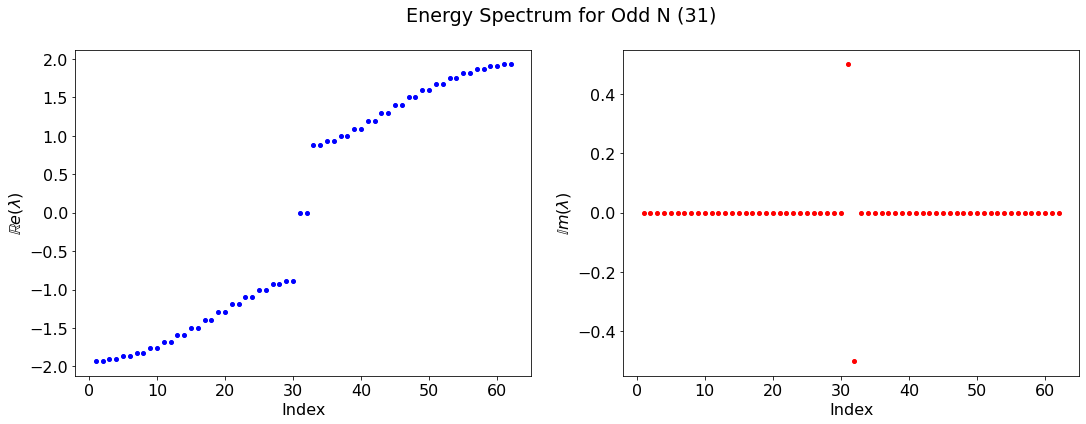

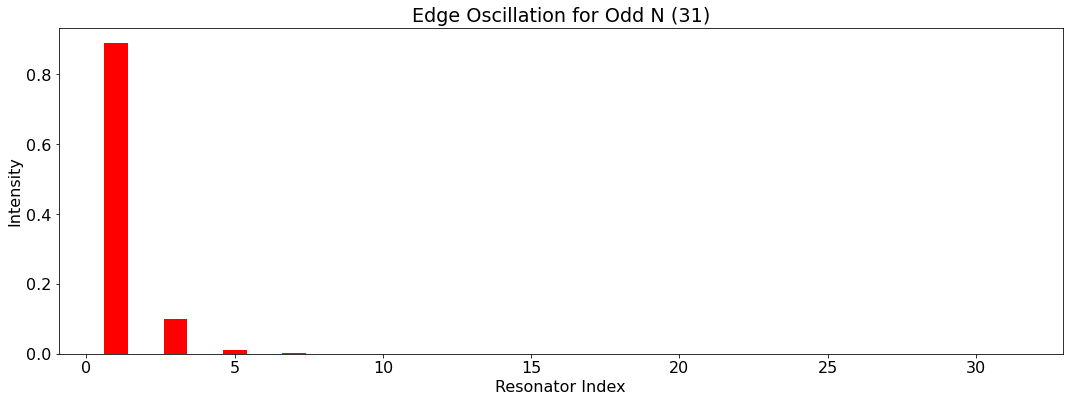

In [8]:
w = 1.5 #J(1+epsilon)
v = 0.5 #J(1-epsilon)
N = 31
g = 0.5
M = 2*N

#Constructing the Linear Hamiltonian
H_L = [[0 for j in range(M)] for i in range(M)]
for r in range(0,M):
    for c in range(0,M):
        if ((r%N)%2 == 0 and c == r+1) or ((c%N)%2 == 0 and r == c+1): 
            H_L[r][c] = v
        elif ((r%N)%2 != 0 and c == r+1) or ((c%N)%2 != 0 and r == c+1):
            H_L[r][c] = w
        if (r==N and c==N-1):
            H_L[r][c]=0
        if (r==N-1 and c==N):
            H_L[r][c]=0
    
#Constructing the Non-linear Hamiltonian
H_NL = [[0 for j in range(M)] for i in range(M)]
for r in range(0,M):
    for c in range(0,M):
        if (r>=N):
            if(r%N == c):
                H_NL[r][c] = g
        if (c>=N):
             if(c%N == r):
                H_NL[r][c] = g         

#Constructing the Boglieubov-deGennes Hamiltonian
H = [[0 for j in range(M)] for i in range(M)]
for r in range(0,M):
    for c in range(0,M):
        H[r][c]=H_L[r][c]+H_NL[r][c]

H_BdG = [[0 for j in range(M)] for i in range(M)]
H_BdG = H
for r in range(0,M):
    for c in range(0,M):
        if (r>=N):
            H_BdG[r][c]=-H[r][c]

#Finding eigenvalues and eigenvectors of the Boglieubov-deGennes Hamiltonian
e_val_H,e_vec_H=np.linalg.eig(H_BdG)
H = qp.Qobj(H_BdG)
H_eval, H_vec = H.eigenstates()

#Plotting the real and imagninary part of the eignevalues
H_imag = []
for i in range(M):
    H_imag.append(np.imag(H_eval[i]))
f = plt.figure()
f.suptitle('Energy Spectrum for Odd N ('+str(N)+')')
plt.subplot(1, 2, 1)
plt.scatter(np.linspace(1,M,M), H_eval, color='blue')
plt.xlabel('Index')
plt.ylabel('$\mathbb{R}e(\lambda)$')
plt.subplot(1, 2, 2)
plt.scatter(np.linspace(1,M,M), H_imag, color='red')
plt.xlabel('Index')
plt.ylabel('$\mathbb{I}m(\lambda)$')
plt.show()

#Plotting the intensities over the two different types of atoms for the edge states
norm_a = [0 for i in range(0,N)]
norm_b = [0 for i in range(0,N)]
for j in range(30,32): 
    vec = H_vec[j]
    for i in range(M):
        a = vec[i]
        if i%2 == 0:
            norm_a[(i%N)%N]+=mod_sq(a[0][0])
        else:
            norm_b[(i%N)%N]+=mod_sq(a[0][0])
plt.bar(np.linspace(1,N,N), norm_a, color='blue')
plt.bar(np.linspace(1,N,N), norm_b, color='red')
plt.title('Edge Oscillation for Odd N ('+str(N)+')')
plt.xlabel('Resonator Index')
plt.ylabel('Intensity')
plt.show()

<div>
<img src="attachment:Kagome.png" width="300"/>
</div>

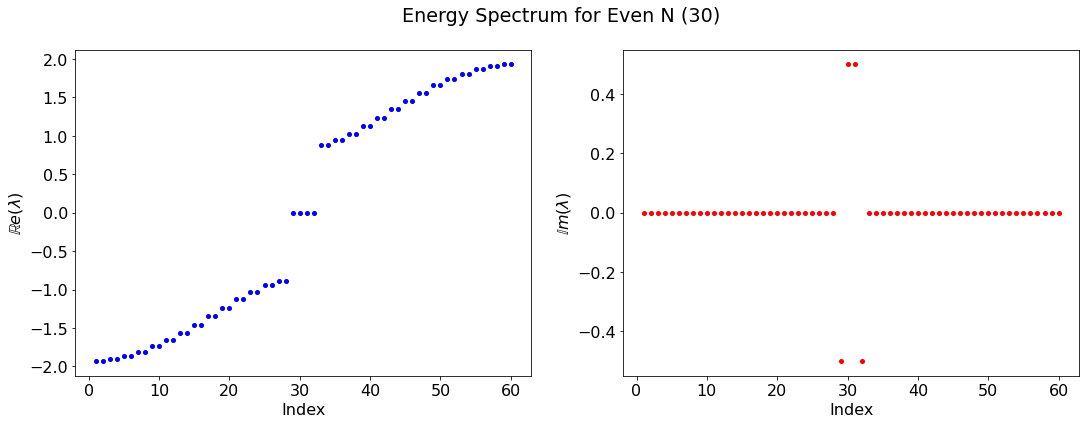

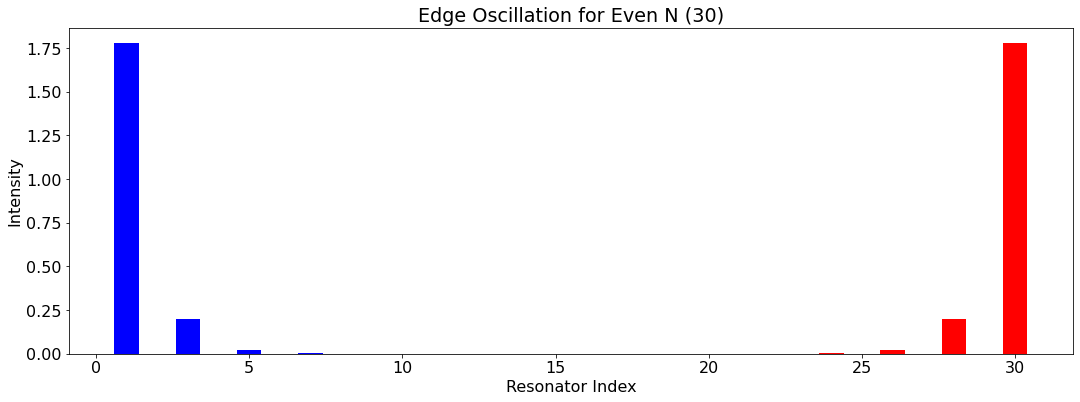

In [9]:
w = 1.5 #J(1+epsilon)
v = 0.5 #J(1-epsilon)
N = 30
g = 0.5
M = 2*N

#Constructing the linear Hamiltonian
H_L = [[0 for j in range(M)] for i in range(M)]
for r in range(0,M):
    for c in range(0,M):
        if ((r%N)%2 == 0 and c == r+1) or ((c%N)%2 == 0 and r == c+1): 
            H_L[r][c] = v
        elif ((r%N)%2 != 0 and c == r+1) or ((c%N)%2 != 0 and r == c+1):
            H_L[r][c] = w
        if (r==N and c==N-1):
            H_L[r][c]=0
        if (r==N-1 and c==N):
            H_L[r][c]=0


#Constructing the non-linear hamiltonian
H_NL = [[0 for j in range(M)] for i in range(M)]
for r in range(0,M):
    for c in range(0,M):
        if (r>=N) and (r%N == c):
              H_NL[r][c] = g
        if (c>=N) and (c%N == r):
              H_NL[r][c] = g 

#Constructing the Boglieubov-deGennes Hamiltonian
H = [[0 for j in range(M)] for i in range(M)]
for r in range(0,M):
    for c in range(0,M):
        H[r][c]=H_L[r][c]+H_NL[r][c]

H_BdG = [[0 for j in range(M)] for i in range(M)]
H_BdG = H
for r in range(0,M):
    for c in range(0,M):
        if (r>=N):
            H_BdG[r][c]=-H[r][c]

H = qp.Qobj(H_BdG)
H_eval, H_vec = H.eigenstates()

#Plotting the real and imaginary parts of the eigenvalues
H_imag = []
for i in range(M):
    H_imag.append(np.imag(H_eval[i]))
f = plt.figure()
f.suptitle('Energy Spectrum for Even N ('+str(N)+')')
plt.subplot(1, 2, 1)
plt.scatter(np.linspace(1,M,M), H_eval, color='blue')
plt.xlabel('Index')
plt.ylabel('$\mathbb{R}e(\lambda)$')
plt.subplot(1, 2, 2)
plt.scatter(np.linspace(1,M,M), H_imag, color='red')
plt.xlabel('Index')
plt.ylabel('$\mathbb{I}m(\lambda)$')
plt.show()

#Plotting the intensities over the two different types of atoms for the edge states
norm_a = [0 for i in range(0,N)]
norm_b = [0 for i in range(0,N)]
for j in range(28,32): 
    vec = H_vec[j]
    for i in range(M):
        a = vec[i]
        if i%2 == 0:
            norm_a[(i%N)%N]+=mod_sq(a[0][0])
        else:
            norm_b[(i%N)%N]+=mod_sq(a[0][0])
plt.bar(np.linspace(1,N,N), norm_a, color='blue')
plt.bar(np.linspace(1,N,N), norm_b, color='red')
plt.title('Edge Oscillation for Even N ('+str(N)+')')
plt.xlabel('Resonator Index')
plt.ylabel('Intensity')
plt.show()

<h3> Open chain Bosonic BdG Hamiltonian with g$\neq$0 and g>2$\epsilon$ </h3>

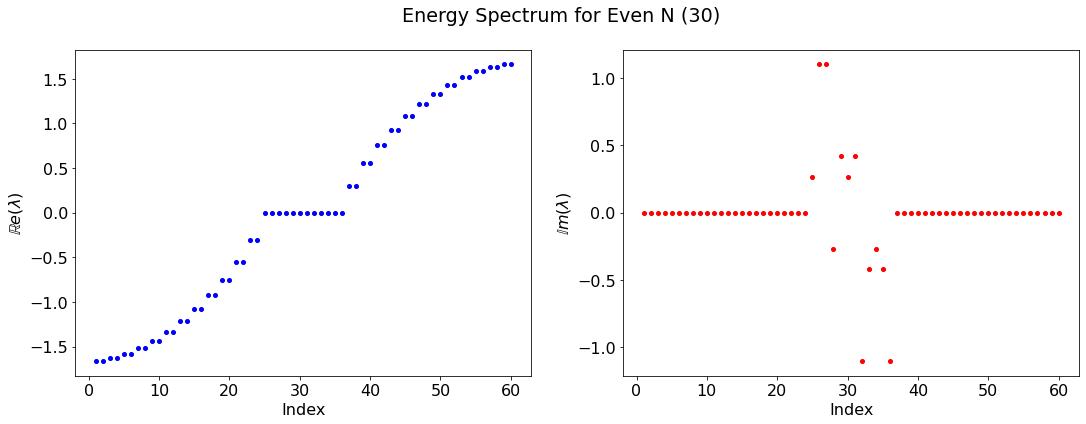

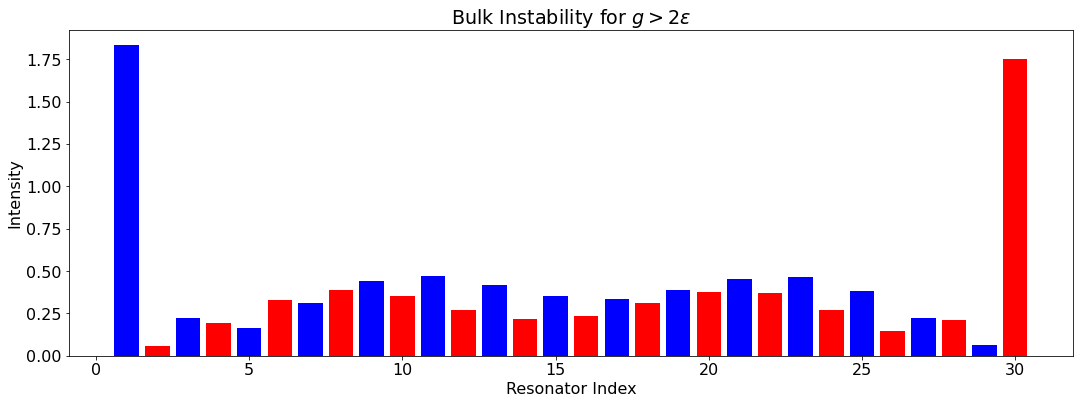

In [15]:
w = 1.5 #J(1+epsilon)
v = 0.5 #J(1-epsilon)
N = 30
g = 1.1
M = 2*N

#Constructing the linear Hamiltonian
H_L = [[0 for j in range(M)] for i in range(M)]
for r in range(0,M):
    for c in range(0,M):
        if ((r%N)%2 == 0 and c == r+1) or ((c%N)%2 == 0 and r == c+1): 
            H_L[r][c] = v
        elif ((r%N)%2 != 0 and c == r+1) or ((c%N)%2 != 0 and r == c+1):
            H_L[r][c] = w
        if (r==N and c==N-1):
            H_L[r][c]=0
        if (r==N-1 and c==N):
            H_L[r][c]=0
    
#Constructing the non-linear Hamiltonian
H_NL = [[0 for j in range(M)] for i in range(M)]
for r in range(0,M):
    for c in range(0,M):
        if (r>=N) and (r%N == c):
              H_NL[r][c] = g
        if (c>=N) and (c%N == r):
             H_NL[r][c] = g 

#Constructing the Boglieubov-deGennes Hamiltonian
H = [[0 for j in range(M)] for i in range(M)]
for r in range(0,M):
    for c in range(0,M):
        H[r][c]=H_L[r][c]+H_NL[r][c]

H_BdG = [[0 for j in range(M)] for i in range(M)]
H_BdG = H
for r in range(0,M):
    for c in range(0,M):
        if (r>=N):
            H_BdG[r][c]=-H[r][c]

e_val_H,e_vec_H=np.linalg.eig(H_BdG)
H = qp.Qobj(H_BdG)
H_eval, H_vec = H.eigenstates()

#Plotting the real and imaginary parts of the eigenvalues
H_imag = []
for i in range(M):
    H_imag.append(np.imag(H_eval[i]))
f = plt.figure()
f.suptitle('Energy Spectrum for Even N ('+str(N)+')')
plt.subplot(1, 2, 1)
plt.scatter(np.linspace(1,M,M), H_eval, color='blue')
plt.xlabel('Index')
plt.ylabel('$\mathbb{R}e(\lambda)$')
plt.subplot(1, 2, 2)
plt.scatter(np.linspace(1,M,M), H_imag, color='red')
plt.xlabel('Index')
plt.ylabel('$\mathbb{I}m(\lambda)$')
plt.show()

#Plotting the intensities over the two types of atoms for a state with a purely imaginary eignevalue
#(which is a part of the unstable bulk)
norm_a = [0 for i in range(0,N)]
norm_b = [0 for i in range(0,N)]
for j in range(24,36): 
    vec = H_vec[j]
    for i in range(M):
        a = vec[i]
        if i%2 == 0:
            norm_a[i%N]+=mod_sq(a[0][0])
        else:
            norm_b[i%N]+=mod_sq(a[0][0])
            
plt.bar(np.linspace(1,N,N), norm_a, color='blue')
plt.bar(np.linspace(1,N,N), norm_b, color='red')
plt.title('Bulk Instability for $g>2\epsilon$')
plt.xlabel('Resonator Index')
plt.ylabel('Intensity')
plt.show()

<h3> Coupling Disorder in the BdG Hamiltonian </h3>

Here we study the behavior of eigenvalues $\lambda$ of the open chain BdG Hamiltonian by varying the coupling parameters $v$ and $w$. We observe that the edge state eigenvalues are left un-changed by the disorder.

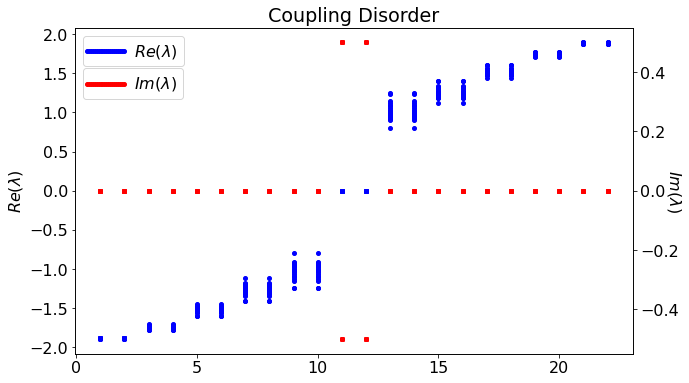

In [11]:
w = np.random.normal(loc = 1.5, scale = 0.05, size = 20) #J(1+epsilon) with detuned epsilon
v = 0.5 #Not used in this block
N = 11
g = 0.5
M = 2*N

fig = plt.figure(figsize = (10, 6)) 
ax1 = plt.gca()
ax2 = ax1.twinx()

l = len(w)
p1 = []
p2 = []
i = 0

for delta in w:
    H_L = [[0 for j in range(M)] for i in range(M)]
    for r in range(0,M):
        for c in range(0,M):
            if ((r%N)%2 == 0 and c == r+1) or ((c%N)%2 == 0 and r == c+1): 
                H_L[r][c] = 2-delta
            elif ((r%N)%2 != 0 and c == r+1) or ((c%N)%2 != 0 and r == c+1):
                H_L[r][c] = delta
            if (r==N and c==N-1):
                H_L[r][c]=0
            if (r==N-1 and c==N):
                H_L[r][c]=0


    H_NL = [[0 for j in range(M)] for i in range(M)]

    for r in range(0,M):
        for c in range(0,M):
            if (r>=N) and (r%N == c):
                  H_NL[r][c] = g
            if (c>=N) and (c%N == r):
                  H_NL[r][c] = g         


    H = [[0 for j in range(M)] for i in range(M)]
    for r in range(0,M):
        for c in range(0,M):
            H[r][c]=H_L[r][c]+H_NL[r][c]

    H_BdG = [[0 for j in range(M)] for i in range(M)]
    H_BdG = H
    for r in range(0,M):
        for c in range(0,M):
            if (r>=N):
                H_BdG[r][c]=-H[r][c]

    H = qp.Qobj(H_BdG)
    H_eval, H_vec = H.eigenstates()
    p1 = p1 + [ax1.scatter(np.linspace(1,M,M), H_eval, color='blue')] # Re(\lambda)
    H_imag = []
    for i in range(M):
        H_imag.append(np.imag(H_eval[i]))
    p2 = p2 + [ax2.scatter(np.linspace(1,M,M), H_imag, color = 'red')] # Im(\lambda)
    i = i + 1
    
l1 = ax1.legend([tuple(p1)], ['$Re(\lambda)$'], handler_map = {tuple: HandlerTuple(ndivide = None)}, loc = 'upper left', bbox_to_anchor = (0, 1))
l2 = ax2.legend([tuple(p2)], ['$Im(\lambda)$'], handler_map = {tuple: HandlerTuple(ndivide = None)}, loc = 'upper left', bbox_to_anchor = (0, 0.9))

ax1.set_ylabel('$Re(\lambda)$')
ax2.set_ylabel('$Im(\lambda)$', rotation = 270)
plt.xlabel('Index')
plt.title('Coupling Disorder')
plt.show()

<h3> 2D Rectangular Lattice Fermionic SSH Model </h3>

The case of a one dimensional SSH-chain was seen in detail above. We will now investigate the peculiarities of a 2-D lattice. The simplest such lattice is a rectangular lattice. The lattice is of the form:

<div>
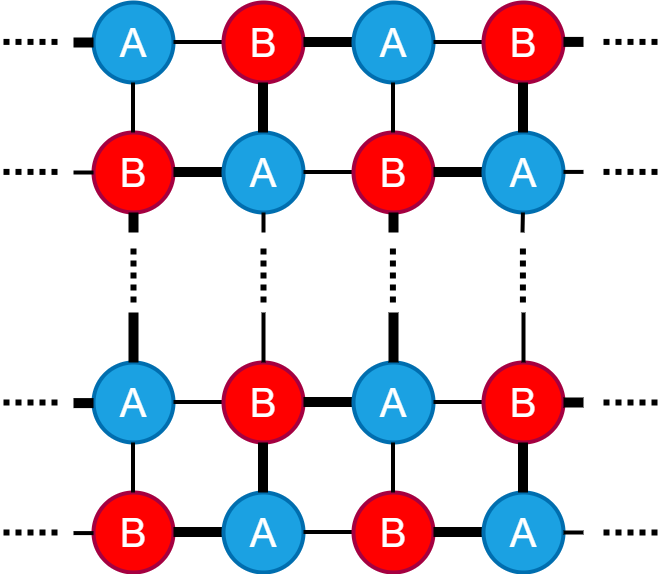
</div>

<p style='text-align:justify;'>Here the lattice is finite in one dimension (y-direction) and infinite (x-direction) in the other direction. The Edge states come about because of the finiteness along one direction. The Hamiltonian is separable as $H(x,y) = H_1(x) + H_2(y)$, hence it will have eigenstates of the form $\psi_1(x) \psi_2(y)$. The energy eigenvalues are sums of the eigenvalues of the periodic Hamiltonian in the x-direction and the open-chain Hamiltonian in the y-direction. The band diagram is simulated below. </p>   

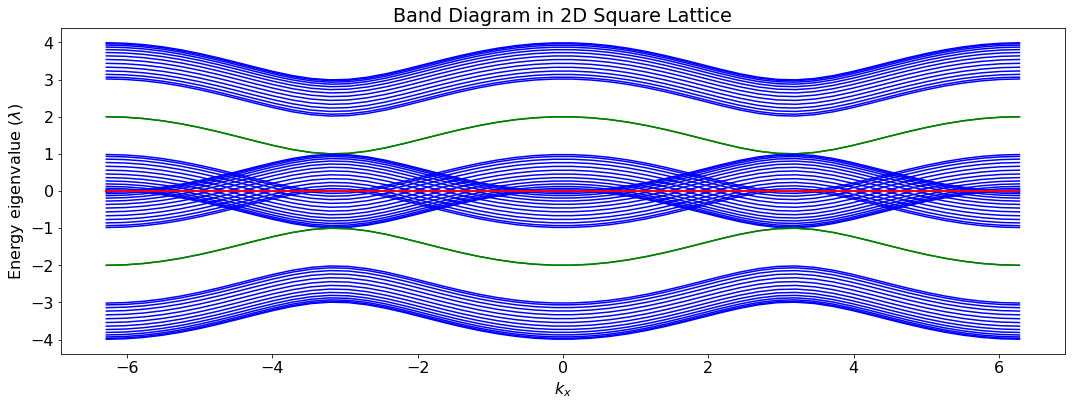

In [11]:
w = 1.5
v = 0.5
N = 30
H_L= [[0 for j in range(N)] for i in range(N)]
 
for r in range(0,N):
    for c in range(0,N):
        if (r%2 == 0 and c == r+1) or (c%2 == 0 and r == c+1): 
            H_L[r][c] = v
        elif (r%2 != 0 and c == r+1) or (c%2 != 0 and r == c+1):
            H_L[r][c] = w

H_lin = qp.Qobj(H_L)
H_eval,H_val = H_lin.eigenstates()
k=np.linspace(-2*np.pi,2*np.pi,50)
 
real_root = [[],[]]
imag_root = [[],[]]
 
for i in range(0,N):
    for j in range(len(k)):
        H_f= [[0 for p in range(2)] for q in range(2)]
        H_f[0][1] = (v + w*complex(np.cos(k[j]),-np.sin(k[j])))
        H_f[1][0] = (v + w*complex(np.cos(k[j]),np.sin(k[j])))
 
        H_fk = qp.Qobj(H_f)
        H_evalf,H_valf = H_fk.eigenstates()
        real_root[0].append(H_eval[i].real+H_evalf[0].real)
        real_root[1].append(H_eval[i].real+H_evalf[1].real)
 
        imag_root[0].append(H_eval[i].imag+H_evalf[0].imag)
        imag_root[1].append(H_eval[i].imag+H_evalf[1].imag)
    if abs(H_eval[i].real)<1e-04:
        plt.plot(k,real_root[0], color='green')
        plt.plot(k,real_root[1], color='green')
    else:
        plt.plot(k,real_root[0], color='blue')
        plt.plot(k,real_root[1], color='blue')
 
    plt.plot(k,imag_root[0], color='red')
    plt.plot(k,imag_root[1], color='red')
    real_root = [[],[]]
    imag_root = [[],[]]
plt.xlabel('$k_x$')
plt.ylabel('Energy eigenvalue ($\lambda$)')
plt.title('Band Diagram in 2D Square Lattice')
plt.show()

## 2D Rectangular Lattice Bosonic SSH Model


In order to find the energies of the system, we need to investigate the nature of the Hamiltonian in both directions. In the finite direction, we have already looked at the energies in detail. In the infinite direction, we can assume periodic boundary conditions essentially closing the loop at infinity. In the case of a N-atom long chain with periodic boundary conditions, we can simplify the wavefunction by exploiting the symmetry by using the Wannier transformation. We will write the wavefunction as 

\begin{equation}
|\psi_{k}>=\frac{1}{\sqrt{N}}\sum_{j}e^{ikj}(a_{k}|2j-1>+b_{k}|2j>)
\end{equation}

Here, we have $k$ to be

\begin{equation}
k=\frac{2m\pi}{N} \qquad m=0,1,\dots,N-1
\end{equation}

(The condition on $k$ tells us that $e^{ikN}=1$ ;which is the manifestation of periodic boundary conditions)
Plugging this expression into

\begin{equation}
H_L|\psi_{k}>=E_{k}|\psi_{k}>
\end{equation}

will give us a simple equation in terms of a new $2\times2$ matrix

\begin{equation}
\begin{bmatrix}
0 & v+we^{-ik}\\
v+we^{ik} & 0
\end{bmatrix}
\begin{bmatrix}
a_{k}\\
b_{k}
\end{bmatrix} =E_{k} \begin{bmatrix}
a_{k}\\
b_{k}
\end{bmatrix}
\end{equation}

This is essentially the linear part of the hamiltonian we had looked at previously. We can add in the non-linear part of it as


\begin{equation}
    H_{NL}=\begin{bmatrix}
    0 & g\\
    g & 0 \\
    \end{bmatrix}
\end{equation}


Now, we have a $4\times4$ matrix 
\begin{equation}
    H = \begin{bmatrix}
    0 &  v+we^{-ik} & g & 0\\
    v+we^{ik} & 0 & 0 & g\\
    g & 0 & 0 & v+we^{-ik}\\
    0 & g & v+we^{ik} & 0\\
    \end{bmatrix}
\end{equation}



The eigenvalues of the matrix $\sigma_z H$ are the relevant energies of the chain with periodic boundary conditions. Now, since we have infinitely many atoms in our lattice (let us assume without loss of generality that the infinite chain is along the x-direction) along the x direction, we have $N\rightarrow\infty$. This essentially turns $k_x$ (initially called $k$) into a continuous variable. 

All of these calculations will be pointless if we cannot separate the Hamiltonian. However, in the case of a rectangular lattice the Hamiltonian can be separated into the sum of two Hamiltonians along the x and y directions. Thus, we can write our final energy eigenvalue as 
\begin{equation}
E=E_{k}+E_{y}
\end{equation}
where $E_{y}$ has been found before in a variety of situations.
This allows us to construct the band diagram for the lattice.

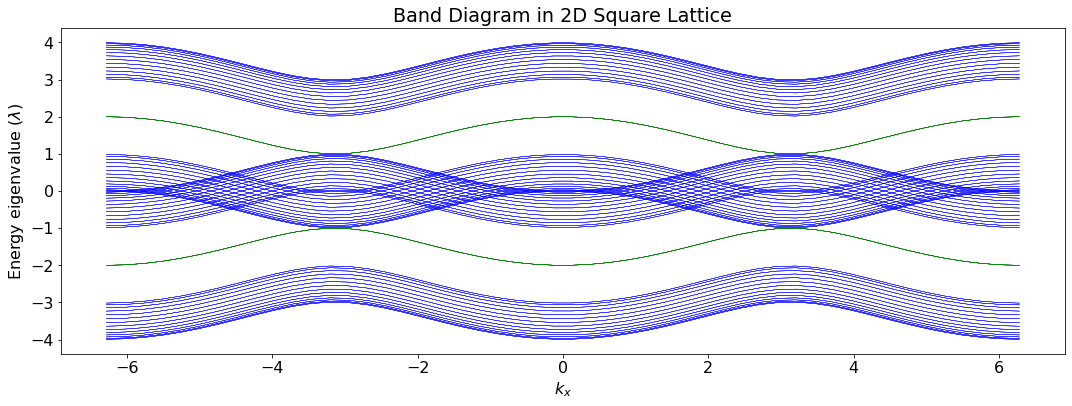

In [12]:
delta = 0
w = 1.5
v = 0.5
g = 0
N = 30
M = 2*N


H= [[0 for j in range(M)] for i in range(M)]
H_L= [[0 for j in range(M)] for i in range(M)]

for r in range(0,M):
    for c in range(0,M):
        if ((r%N)%2 == 0 and c == r+1) or ((c%N)%2 == 0 and r == c+1): 
            H_L[r][c] = 2-w
        elif ((r%N)%2 != 0 and c == r+1) or ((c%N)%2 != 0 and r == c+1):
            H_L[r][c] = w
        if (r==c):
            H_L[r][c] = delta
        if (r==N and c==N-1):
            H_L[r][c]=0
        if (r==N-1 and c==N):
            H_L[r][c]=0
H_NL = [[0 for j in range(M)] for i in range(M)]

for r in range(0,M):
    for c in range(0,M):
        if (r>=N) and (r%N == c):
             H_NL[r][c] = g
        if (c>=N) and (c%N == r):
             H_NL[r][c] = g 
for r in range(0,M):
    for c in range(0,M):
            if (r<N): 
                H[r][c]=H_L[r][c]+H_NL[r][c]
            else:
                H[r][c]=H_L[r][c]+H_NL[r][c]

H_BdG = qp.Qobj(H)
H_eval,H_vec = H_BdG.eigenstates()

k=np.linspace(-2*np.pi,2*np.pi,50)

real_root = [[],[],[],[]]

for i in range(0,M):

    for j in range(len(k)):
        exp_mik = complex(np.cos(k[j]),-np.sin(k[j]))
        exp_ik = complex(np.cos(k[j]),np.sin(k[j]))
        H_f= [[0 for p in range(4)] for q in range(4)]
        
        for r in range(4):
            for c in range(4):
                if r==c:
                    H_f[r][c] = delta

        H_f[0][1] = (v + w*exp_mik)
        H_f[2][3] = (v + w*exp_mik)
        H_f[1][0] = (v + w*exp_ik)
        H_f[3][2] = (v + w*exp_ik)
        H_f[0][2] = g
        H_f[2][0] = g
        H_f[3][1] = g
        H_f[1][3] = g

        for r in range(0,4):
            for c in range(0,4):
                if (r>=2):
                    H_f[r][c]=-H_f[r][c]
        H_fk = qp.Qobj(H_f)
        H_evalf,H_vecf = H_fk.eigenstates()

        for a in range(4):
            real_root[a].append(H_eval[i].real+H_evalf[a].real)

    if abs(H_eval[i].real)>1e-4:
        for a in range(4):
            plt.plot(k,real_root[a], color='blue', linewidth = 0.3)
    else:
        for a in range(4):
            plt.plot(k,real_root[a], color='green', linewidth = 0.3)

    real_root = [[],[],[],[]]
plt.xlabel('$k_x$')
plt.ylabel('Energy eigenvalue ($\lambda$)')
plt.title('Band Diagram in 2D Square Lattice')
plt.show()

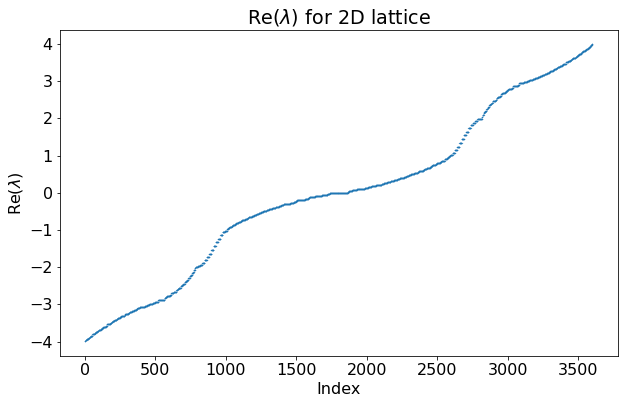

In [13]:
e_val_x = H_eval
e_val_y = H_eval
e_val_tot = []
k = 0
for i in range(M):
    for j in range(M):
        e_val_tot.append(e_val_x[i].real + e_val_y[j].real)
        
e_val_tot = np.sort(e_val_tot)

fig = plt.figure(figsize = (10, 6))
plt.title('Re($\lambda$) for 2D lattice')
plt.ylabel('Re($\lambda$)')
plt.xlabel('Index')
plt.scatter(np.linspace(1, M**2, M**2), e_val_tot, s=0.1)
plt.show()

A more interesting lattice is a Kagome lattice. It looks as follows:

<div>
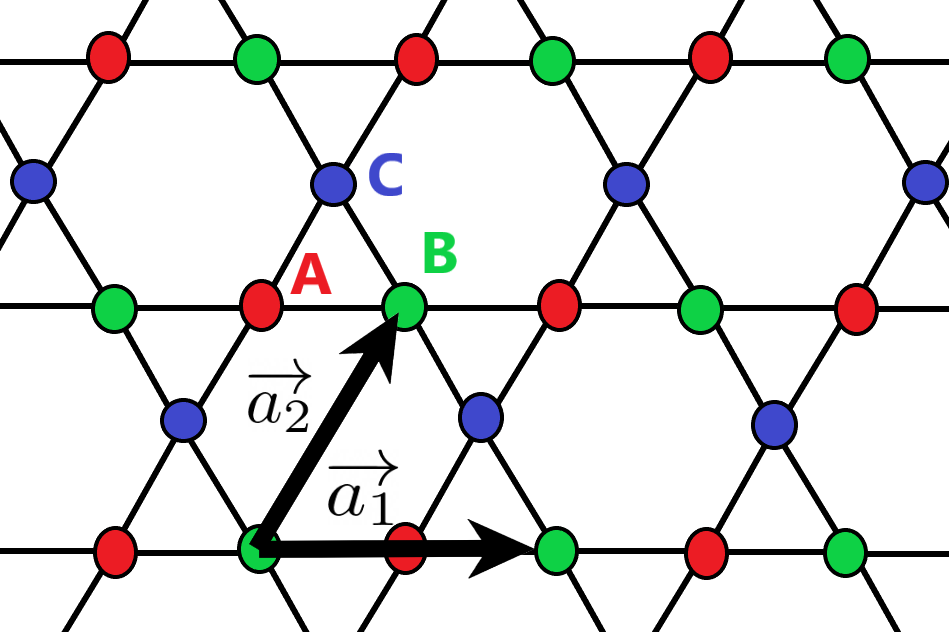
</div>

For this lattice, we can construct the Hamiltonian as follows
\begin{equation}
H_{Kagome}=\sum_{n,m}(C^{\dagger}_{nm} A_{nm}+ B^{\dagger}_{nm}A_{nm} + A^{\dagger}_{nm}B_{nm} + C^{\dagger}_{n(m-1)}A_{nm} + B^{\dagger}_{(n-1)(m+1)}C_{nm} + A^{\dagger}_{(n+1)m}B_{nm} + H.C.)
\end{equation} 

The band diagram for such a lattice resembles the one given in the paper.

<h3>Squeezed States in the Quantum Regime</h3>
<p style='text-align:justify;'>
The parametric resonators in the SSH chain can display quadrature squeezing below th gain threshold, where the noise in one quadrature is squeezed below the shot noise limit, and the excess noise is accumulated in the orthogonal quadrature. (See <b>Appendix A
</b> for a brief overview of Squeezed states of light). However, preserving the squeezing in the quadrature of interest is challenging, since the presence of disorders in the lattice can degrade the squeezing in the original quadraturedue to mixing with the antisqueezed component. Here, the behavior of topological quantum squeezed states is investigated in the presence of disorders. The central result which is demonstrated, is that quadrature squeezing is protected in the topological edge modes of the SSH lattice from random coupling disorders in the Hamiltonian. In contrast, the nontopological case is more susceptible to squeezing degradation in the presence of such disorders. Thus, topological edge modes in the lattice provide a novel way to preserve squeezed states generated from optical paramteric oscillations.
</p>
<p style='text-align:justify;'>
To begin with, the 1D SSH model is considered, whose dynamics is modelled using the Heisenberg-Langevin equations. The signal fields in the resonators constituting the OPO's are characterized by the operators
$\hat{a}_{i}\;\; i \in \{1,2,...,N\}$ (N being the number of OPOs in the SSH lattice). They experience a roundtrip loss in the optical cavity ($\gamma$) which has two contributions:- out-coupling loss ($\mu$) and round-trip propagation loss ($\alpha$). The OPOs operate below the gain threshold. The pump is non-resonant and the pumps driving the OPOs are not coupled to each other. All the OPOs are assumed to experience identical loss, coupling and pump drives. The losses arising from these different mechanisms and the accompanying fluctuations ($\hat{V}$) are included in the <b>Heisenberg-Langevin</b> equations:
</p>

\begin{equation}
    \dot{\hat{a_{i}}} = -\gamma \hat{a_{i}} + g\hat{a_{i}}^{\dagger} + \sum_{j \neq i}i\kappa_{i,j}\hat{a_{j}} + \sqrt{2\alpha}\hat{V}_{\alpha,a_{i}} + \sqrt{2\mu}\hat{V}_{\mu,a_{i}} \tag{1}
\end{equation}

where, $\kappa_{i,j}=H_{L}(i,j)$ is the $(i,j)$th term of the SSH chain Hamiltonian. 

The corresponding output fields can be mapped to the signal fields as:

\begin{equation}
   \hat{A}_{i,out} = \sqrt{2\mu} \hat{a_{i}} - \hat{V}_{\mu,a_{i}} \tag{2}
\end{equation}
<p align="justify">
The fluctuations $\hat{V}$ have $0$ mean field and are delta-correlated Gaussian noise sources. Noise from independent channels are non-correlated. The fluctuations follow the commutation relations:
</p>
\begin{align}
    \langle \hat{V}_{l,j}(t) \hat{V}_{l',j'}^{\dagger}(t') \rangle &= \delta_{ll'}\delta_{jj'}\delta(t-t')  \\
    \langle \hat{V}_{l,j}^{\dagger}(t) \hat{V}_{l',j'}(t') \rangle &= \langle \hat{V}_{l,j}(t) \hat{V}_{l',j'}(t') \rangle = \langle \hat{V}_{l,j}^{\dagger}(t) \hat{V}_{l',j'}^{\dagger}(t') \rangle = 0 \tag{3}
\end{align}
<p align="justify">
The amplitude and phase quadratures as defined as follows: $\hat{X}_{i} = \hat{a}_{i}+\hat{a}_{i}^{\dagger}$, $\hat{Y}_{i}=-i(\hat{a}_{i} - \hat{a}_{i}^{\dagger})$. Below threshold, the mean values of the fields are zero. The Langevin equations can be expressed compactly as: 
</p>

\begin{equation}
    \dot{\begin{bmatrix}
        \hat{X}\\
        \hat{Y}\\
    \end{bmatrix}} 
    = J\begin{bmatrix}
        \hat{X}\\
        \hat{Y}\\
    \end{bmatrix}
    +\sqrt{2\alpha}\begin{bmatrix}
        \hat{W}^{\alpha}_0\\
        \hat{W}^{\alpha}_{\frac{\pi}{2}}\\
    \end{bmatrix}
    +\sqrt{2\mu}\begin{bmatrix}
        \hat{W}^{\mu}_0\\
        \hat{W}^{\mu}_{\frac{\pi}{2}}\\
    \end{bmatrix}    \tag{4}
\end{equation}


where $
    \hat{X}=\begin{bmatrix}
       \hat{X_1}&\dots& \hat{X_N}
    \end{bmatrix}^T, \; 
    \hat{Y}=\begin{bmatrix}
       \hat{Y_1}&\dots& \hat{Y_N}
    \end{bmatrix}^T, \;
    \hat{W^j_i}=\begin{bmatrix}
       \hat{W}^{j,a_1}_0&\dots& \hat{W}^{j,a_N}_0
    \end{bmatrix}^T
$
for $j\in \{ \mu, \alpha\}$ and $i \in \{0,\frac{\pi}{2}\}$. 

\begin{equation}
    J=-\gamma\mathbb{1}_{2N}
    +g\begin{bmatrix}
       \mathbb{1}_{2N}& 0 \\
       0 & -\mathbb{1}_{2N} \\
    \end{bmatrix}
    + \begin{bmatrix}
       0 & -H_{NL} \\
       H_{NL} & 0\\
    \end{bmatrix} \tag{5}
\end{equation}


where $I_{N}$ is an identity matrix of order $N$. And,


$\hat{W}_{j,0}^{l} = \hat{V}_{l,j}+\hat{V}^{†}_{i,j}$,     $\hat{W}_{j,\frac{\pi}{2}}^{l} = -i(\hat{V}_{l,j}-\hat{V}^{†}_{i,j})$,     $l \in \{ \mu, \alpha\}$ and $j \in \{a_{1},...,a_{N} \}$.


The respective output field can be mapped to the signal field as:


\begin{equation}
    \begin{bmatrix}
        \hat{X}_{out}\\
        \hat{Y}_{out}\\
    \end{bmatrix}
    = \sqrt{2\mu}\begin{bmatrix}
        \hat{X}\\
        \hat{Y}\\
    \end{bmatrix}
    -\begin{bmatrix}
        \hat{W}^{\mu}_0\\
        \hat{W}^{\mu}_{\frac{\pi}{2}}\\
    \end{bmatrix} \tag{6}
\end{equation}


In the spectral domain one obtains, 


\begin{equation}
    \begin{bmatrix}
        \hat{X}_{out}\\
        \hat{Y}_{out}\\
    \end{bmatrix}
    = -\sqrt{2\mu}\begin{bmatrix}
        J + i\omega\mathbb{1}_{2N}\\
    \end{bmatrix}^{-1}
    \left(\sqrt{2\alpha}\begin{bmatrix}
        \hat{W}^{\alpha}_0\\
        \hat{W}^{\alpha}_{\frac{\pi}{2}}\\
    \end{bmatrix}
    +\sqrt{2\mu}\begin{bmatrix}
        \hat{W}^{\mu}_0\\
        \hat{W}^{\mu}_{\frac{\pi}{2}}\\
    \end{bmatrix}\right)
    -\begin{bmatrix}
        \hat{W}^{\mu}_0\\
        \hat{W}^{\mu}_{\frac{\pi}{2}}\\
    \end{bmatrix}  \tag{7}
\end{equation}


The output correlation matrix in the spectral domain is written as:


\begin{equation}
    C^{out}(\omega)=\int_{-\infty}^{\infty}d\omega'\left\langle\begin{bmatrix}
        \tilde{X}_{out}(\omega')\\
        \tilde{Y}_{out}(\omega')\\
    \end{bmatrix}
    \begin{bmatrix}
        \tilde{X}_{out}(\omega')\\
        \tilde{Y}_{out}(\omega')\\
    \end{bmatrix}^T\right\rangle  \tag{7}
\end{equation}

\begin{align}
    C^{out}(\omega)&=\left(2\mu\begin{bmatrix}J+i\omega\mathbb{1}_{2N}\end{bmatrix}^{-1}+\mathbb{1}_{2N}\right)C^{in}(\omega)
\left(2\mu\begin{bmatrix}J-i\omega\mathbb{1}_{2N}\end{bmatrix}^{-1}+\mathbb{1}_{2N}\right)^T\\
&+4\mu\alpha\left(2\mu\begin{bmatrix}J+i\omega\mathbb{1}_{2N}\end{bmatrix}^{-1}\right)C^{in}(\omega)
\left(2\mu\begin{bmatrix}J-i\omega\end{bmatrix}^{-1}+\mathbb{1}_{2N}\right)^T   \tag{8}
\end{align}


with the input correlation matrix as:


\begin{equation}
    C^{in}(\omega)=\begin{bmatrix}
        \mathbb{1}_N & i\mathbb{1}_N\\
        -i\mathbb{1}_N & \mathbb{1}_N\\
    \end{bmatrix}  \tag{9}
\end{equation}

<p style='text-align:justify;'>
    The <b>Amplitude Quadrature squeezing </b> for the $i$th resonator in the spectral domain is expressed as the $(i,i)$th component of the output correlation matrix. The <b>Phase Quadrature squeezing</b> is correspondingly the $(N+i,N+i)$th component of the correlation matrix. Note that for phase quadrature squeezing is always less than 1, which is the Shot Noise Limit (SNL). 
</p>


---
<p align="justify">
The Phase Quadrature Squeezing is plotted (Fig. 4.(a)) for the topological edge mode for the signal field corresponding to the $N$th resonator in two scenarious - one in the presence of coupling ($\kappa_{1},\kappa_{2} \neq 0$) and the other which is completely uncoupled ($\kappa_{1} = \kappa_{2} = 0$). 
</p>

In [9]:
#Code to plot Phase Quadrature squeezing in the spectral domain for the coupled lattice
k1 = 0.5 #intracell hopping
k2 = 1.5 #intercell hopping
N = 11 #No. of OPOs
g = 5.2 #gain parameter
M = 2*N
y= 12 #total roundtrip loss
u = 10.8 #out-coupling loss
a = 1.2 #roundtrip propagation loss
scalefactor = 0.08 #scalefactor to scale the frequency axis

I_N = np.identity(N,dtype = 'complex_')
I_2N = np.identity(M,dtype = 'complex_')
H_L = np.zeros([N,N],dtype = 'complex')
J = np.zeros([M,M],dtype = 'complex_')
M1 = np.zeros([M,M],dtype = 'complex_')
M2 = np.zeros([M,M],dtype = 'complex_')
M1_INV = np.zeros([M,M],dtype = 'complex_')
M2_INV = np.zeros([M,M],dtype = 'complex_')
#Cin is the input correlation matrix
C_IN = np.zeros([M,M],dtype = 'complex_')

for i in range(0,N,2): #initialising the SSH linear Hamiltonian
    if(i<N-1):
        H_L[i,i+1] = k1
        H_L[i+1,i] = k1
    if(i<N-2):
        H_L[i+1,i+2] = k2
    if(i>0):
        H_L[i,i-1] = k2

J[0:N , 0:N] = np.multiply(g-y,I_N)
J[0:N , N:2*N] = -H_L
J[N:2*N , 0:N] = H_L
J[N:2*N , N:2*N] = np.multiply(-g-y,I_N)

C_IN[0:N , 0:N] = I_N
C_IN[0:N , N:2*N] = complex(0,1)*I_N
C_IN[N:2*N , 0:N] = -complex(0,1)*I_N
C_IN[N:2*N , N:2*N] = I_N

o = np.linspace(0,100,100)
#Cout is the output correlation matrix
C_OUT = np.zeros([100,M,M],dtype='complex_')
C_OUT1 = np.zeros([100,M,M],dtype='complex_')
C_OUT2 = np.zeros([100,M,M],dtype='complex_')

for i in range(0,100):
    M1 = J + complex(0,1)*o[i]*I_2N
    M2 = J - complex(0,1)*o[i]*I_2N
    M1_INV = np.linalg.inv(M1)
    M2_INV = np.linalg.inv(M2)
    C_OUT1[i,:,:] = np.dot((2*u*M1_INV)+I_2N,np.dot(C_IN,np.transpose(2*u*M2_INV+I_2N)))
    C_OUT2[i,:,:] = np.dot(4*u*a*M1_INV,np.dot(C_IN,np.transpose(M2_INV)))
    C_OUT[i,:,:] = C_OUT1[i,:,:] + C_OUT2[i,:,:]

#C1 stores the phase squeezed quadrature corresponding to the Nth resonator    
C1 = C_OUT[:,2*N-1,2*N-1]

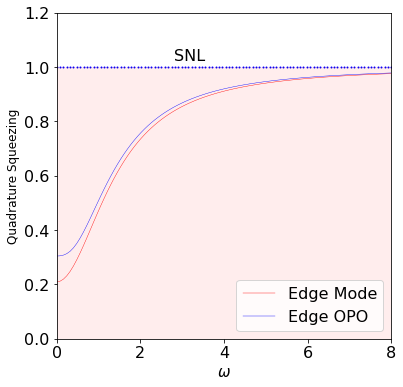

In [10]:
#Code to plot Phase Quadrature squeezing in the spectral domain for the coupled lattice
k1 = 0 
k2 = 0
N = 11
g = 5.8
M = 2*N
y= 12
u = 10.8
a = 1.2
scalefactor = 0.08

I_N = np.identity(N,dtype = 'complex_')
I_2N = np.identity(M,dtype = 'complex_')
H_L = np.zeros([N,N],dtype = 'complex_')
J = np.zeros([M,M],dtype = 'complex_')
M1 = np.zeros([M,M],dtype = 'complex_')
M2 = np.zeros([M,M],dtype = 'complex_')
M1_INV = np.zeros([M,M],dtype = 'complex_')
M2_INV = np.zeros([M,M],dtype = 'complex_')
C_IN = np.zeros([M,M],dtype = 'complex_')

for i in range(0,N,2):
    if(i<N-1):
        H_L[i,i+1] = k1
        H_L[i+1,i] = k1
    if(i<N-2):
        H_L[i+1,i+2] = k2
    if(i>0):
        H_L[i,i-1] = k2


J[0:N , 0:N] = np.multiply(g-y,I_N)
J[0:N , N:2*N] = -H_L
J[N:2*N , 0:N] = H_L
J[N:2*N , N:2*N] = np.multiply(-g-y,I_N)

C_IN[0:N , 0:N] = I_N
C_IN[0:N , N:2*N] = complex(0,1)*I_N
C_IN[N:2*N , 0:N] = -complex(0,1)*I_N
C_IN[N:2*N , N:2*N] = I_N

o = np.linspace(0,100,100)
C_OUT = np.zeros([100,M,M],dtype='complex_')
C_OUT1 = np.zeros([100,M,M],dtype='complex_')
C_OUT2 = np.zeros([100,M,M],dtype='complex_')

for i in range(0,100):
    M1 = J + complex(0,1)*o[i]*I_2N
    M2 = J - complex(0,1)*o[i]*I_2N
    M1_INV = np.linalg.inv(M1)
    M2_INV = np.linalg.inv(M2)
    C_OUT1[i,:,:] = np.dot((2*u*M1_INV)+I_2N,np.dot(C_IN,np.transpose(2*u*M2_INV+I_2N)))
    C_OUT2[i,:,:] = np.dot(4*u*a*M1_INV,np.dot(C_IN,np.transpose(M2_INV)))
    C_OUT[i,:,:] = C_OUT1[i,:,:] + C_OUT2[i,:,:]

C2 = C_OUT[:,2*N-1,2*N-1]
#Array to store values for shot noise limit
SNL = np.zeros(100)
for i in range(0,100):
    SNL[i] = 1

plt.rcParams['figure.figsize'] = [6, 6]
plt.plot(o*scalefactor, C2, color = 'red' , linewidth = 0.4, label = 'Edge Mode')
plt.plot(o*scalefactor, C1, color = 'blue' , linewidth = 0.4, label = 'Edge OPO') 
plt.scatter(o*scalefactor, SNL, color = 'blue', s = 1)
plt.xlim(0,8)
plt.ylim(0,1.2)
plt.xlabel('$\omega$', fontsize = 15)
plt.ylabel('Quadrature Squeezing', fontsize = 12)
plt.text(2.8, 1.025, 'SNL')
plt.axhspan(0, 1, facecolor ='r', alpha = 0.07)
plt.legend(loc ="lower right")
plt.show()

<p style='text-align:justify;'>
<i>Fig 4(a): Quadrature squeezing observed in the topological edge mode of the 1D SSH model. The edge mode (in the coupled case) spans over multiple resonators, while in the uncoupled lattice remains restricted to the boundary resonator only. Parameter values used: $N = 11, \alpha = 1.2, \mu = 10.8, \gamma = 12, \kappa_{1}=0.5, \kappa_{2}=1.5$ (in coupled lattice and both 0 in uncoupled case.)</i>
</p> 

<p style='text-align:justify;'>
The adjacent sites in the SSH chain (say in sublattice A) of the edge mode are entangled, which can be confirmed by the *Duan Separability criterion*. To verify this property, resonators $1$ and $3$ are considered the entanglement is reflected in the sum of quadrature component variances, as shown in Fig 4.b.
</p>

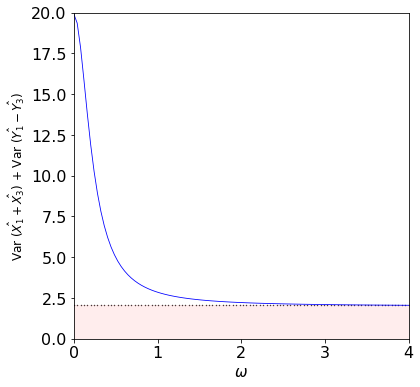

In [11]:
#Code to demonstrate the entanglement between the first and third resonator of the edge mode
k1 = 0.5
k2 = 1.5
N = 11
g = 6.5
M = 2*N
y= 12
u = 10.8
a = 1.2
scalefactor = 0.04

I_N = np.identity(N,dtype = 'complex_')
I_2N = np.identity(M,dtype = 'complex_')
H_L = np.zeros([N,N],dtype = 'complex_')
J = np.zeros([M,M],dtype = 'complex_')
M1 = np.zeros([M,M],dtype = 'complex_')
M2 = np.zeros([M,M],dtype = 'complex_')
M1_INV = np.zeros([M,M],dtype = 'complex_')
M2_INV = np.zeros([M,M],dtype = 'complex_')
C_IN = np.zeros([M,M],dtype = 'complex_')

for i in range(0,N,2):
    if(i<N-1):
        H_L[i,i+1] = k1
        H_L[i+1,i] = k1
    if(i<N-2):
        H_L[i+1,i+2] = k2
    if(i>0):
        H_L[i,i-1] = k2

J[0:N , 0:N] = np.multiply(g-y,I_N)
J[0:N , N:2*N] = -H_L
J[N:2*N , 0:N] = H_L
J[N:2*N , N:2*N] = np.multiply(-g-y,I_N)

C_IN[0:N , 0:N] = I_N
C_IN[0:N , N:2*N] = complex(0,1)*I_N
C_IN[N:2*N , 0:N] = -complex(0,1)*I_N
C_IN[N:2*N , N:2*N] = I_N

o = np.linspace(0,100,100)
C_OUT = np.zeros([100,M,M],dtype='complex_')
C_OUT1 = np.zeros([100,M,M],dtype='complex_')
C_OUT2 = np.zeros([100,M,M],dtype='complex_')

linemarker = np.zeros(100)
for i in range(0,100):
    linemarker[i] = 2.1

for i in range(0,100):
    M1 = J + complex(0,1)*o[i]*I_2N
    M2 = J - complex(0,1)*o[i]*I_2N
    M1_INV = np.linalg.inv(M1)
    M2_INV = np.linalg.inv(M2)
    C_OUT1[i,:,:] = np.dot((2*u*M1_INV)+I_2N,np.dot(C_IN,np.transpose(2*u*M2_INV+I_2N)))
    C_OUT2[i,:,:] = np.dot(4*u*a*M1_INV,np.dot(C_IN,np.transpose(M2_INV)))
    C_OUT[i,:,:] = C_OUT1[i,:,:] + C_OUT2[i,:,:]


plt.plot(o*scalefactor, C_OUT[0:100,0,0]+C_OUT[0:100,2,2]+C_OUT[0:100,N,N]-C_OUT[0:100,N+2,N+2], color = 'blue', linewidth = 0.8) 
plt.scatter(o*scalefactor, linemarker, color = 'black', s = 0.15)
plt.xlim(0,4)
plt.ylim(0,20)
plt.xlabel('$\omega$', fontsize = 15)
plt.ylabel('Var ($\hat{X_{1}}+\hat{X_{3}}$) + Var ($\hat{Y_{1}}-\hat{Y_{3}}$)', fontsize = 12)
plt.axhspan(0, 2.1, facecolor ='r', alpha = 0.07)
plt.show()

<p align="justify">
<i>
Fig 4(b): Entanglement between the first and third resonator of the edge mode as evident from the sum of variances being less than 2.5 for sufficiently large $\omega$. All parameters used are same as in Fig 4.a, except the gain is $g=6.5$ here. 
</i>
</p>

<p astyle='text-align:justify;'>
Next, the phase quadrature squeezing is plotted for different coupling disorder realizations for both the topological ($\kappa_{1} < \kappa_{2}$) and trivial ($\kappa_{1} > \kappa_{2}$) cases. The coupling disorder is implemented by taking a normal distribution of values for $\kappa_{1}$ and $\kappa_{2}$  with mean $\bar{\kappa_{1}}=0.5$ ($\bar{\kappa_{1}}=1.5$) and $\bar{\kappa_{2}}=1.5$ ($\bar{\kappa_{2}}=0.5$) for the topological (trivial) cases and a standard deviation of $0.2$. The quadrature squeezing is protected from such disorders in the topological case, whereas the non-topological case is more susceptible to squeezing degradation, as shown in Fig 4(e),(f).
</p>


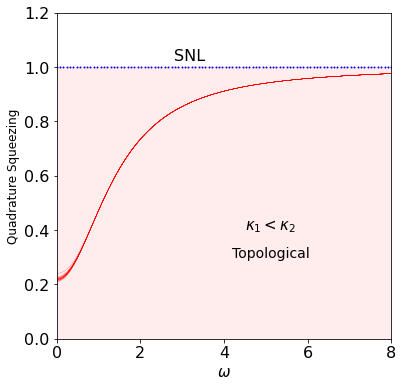

In [12]:
#Code to plot quadrature squeezing in the topological case for different coupling disorder realisations
#Coupling disorders realised as a normal distribution of k1 and k2 with standard dev. 0.2
epsilon = np.random.normal(loc = 0.5, scale = 0.2,  size = 20)
size = 20
N = 11
g = 5.8
M = 2*N
y= 12
u = 10.8
a = 1.2
scalefactor = 0.08

k1 = np.zeros(size, dtype = 'complex_')
k2 = np.zeros(size, dtype = 'complex_')
for i in range(0,20):
    k1[i] = 1 - epsilon[i]
    k2[i] = 1 + epsilon[i]

I_N = np.identity(N,dtype = 'complex_')
I_2N = np.identity(M,dtype = 'complex_')
H_L = np.zeros([size,N,N],dtype = 'complex_')
J = np.zeros([size,M,M],dtype = 'complex_')
M1 = np.zeros([100,size,M,M],dtype = 'complex_')
M2 = np.zeros([100,size,M,M],dtype = 'complex_')
M1_INV = np.zeros([100,size,M,M],dtype = 'complex_')
M2_INV = np.zeros([100,size,M,M],dtype = 'complex_')
C_IN = np.zeros([M,M],dtype = 'complex_')

for i in range (0,size):
    for j in range(0,N,2):
        if(j<N-1):
            H_L[i,j,j+1] = k2[i]
            H_L[i,j+1,j] = k2[i]
        if(j<N-2):
            H_L[i,j+1,j+2] = k1[i]
        if(i>0):
            H_L[i,j,j-1] = k1[i]

J[:, 0:N , 0:N] = np.multiply(g-y,I_N)
J[:, 0:N , N:2*N] = -H_L
J[:, N:2*N , 0:N] = H_L
J[:, N:2*N , N:2*N] = np.multiply(-g-y,I_N)

C_IN[0:N , 0:N] = I_N
C_IN[0:N , N:2*N] = complex(0,1)*I_N
C_IN[N:2*N , 0:N] = -complex(0,1)*I_N
C_IN[N:2*N , N:2*N] = I_N

o = np.linspace(0,100,100)
C_OUT = np.zeros([100,size,M,M],dtype='complex_')
C_OUT1 = np.zeros([100,size,M,M],dtype='complex_')
C_OUT2 = np.zeros([100,size,M,M],dtype='complex_')

for i in range(0,100):
    for j in range(0,size):
        M1[i,j,:,:] = J[j,:,:] + complex(0,1)*o[i]*I_2N
        M2[i,j,:,:] = J[j,:,:] - complex(0,1)*o[i]*I_2N
        M1_INV[i,j,:,:] = np.linalg.inv(M1[i,j,:,:])
        M2_INV[i,j,:,:] = np.linalg.inv(M2[i,j,:,:])
        C_OUT1[i,j,:,:] = np.dot((2*u*M1_INV[i,j,:,:])+I_2N,np.dot(C_IN,np.transpose(2*u*M2_INV[i,j,:,:]+I_2N)))
        C_OUT2[i,j,:,:] = np.dot(4*u*a*M1_INV[i,j,:,:],np.dot(C_IN,np.transpose(M2_INV[i,j,:,:])))
        C_OUT[i,j,:,:] = C_OUT1[i,j,:,:] + C_OUT2[i,j,:,:]

SNL = np.zeros(100)
for i in range(0,100):
    SNL[i] = 1


for i in range(1,size):
    plt.plot(o*scalefactor, C_OUT[:,i,2*N-1,2*N-1], color = 'red',  linewidth=0.2)
plt.scatter(o*scalefactor, SNL, color = 'blue', s = 1)
plt.xlim(0,8)
plt.ylim(0,1.2)
plt.xlabel('$\omega$', fontsize = 15)
plt.ylabel('Quadrature Squeezing', fontsize = 12)
plt.text(2.8, 1.025, 'SNL')
plt.text(4.5, 0.4, '$\kappa_{1} < \kappa_{2}$', fontsize = 15)
plt.text(4.18, 0.3, 'Topological', fontsize = 14)
plt.axhspan(0, 1, facecolor ='r', alpha = 0.07)
plt.show()

<p align="justify">
<i>
Fig 4(e): Protection of the quadrature squeezing against coupling disorders in the topological case $(\kappa_{1}<\kappa_{2})$. Different disorder realizations are overlaid together from a normal distribution
</i>
</p>

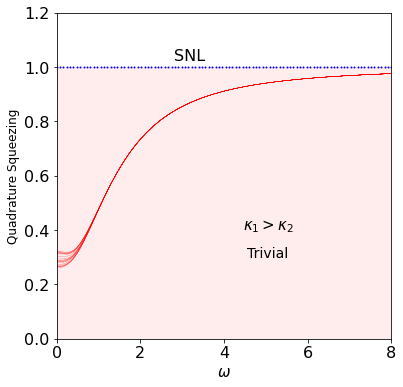

In [13]:
#Code to plot quadrature squeezing in the trivial case for different coupling disorder realisations
#Coupling disorders realised as a normal distribution of k1 and k2 with standard dev. 0.2
epsilon = np.random.normal(loc = -0.5, scale = 0.2,  size = 20)
size = 20
N = 11
g = 5.8
M = 2*N
y= 12
u = 10.8
a = 1.2
scalefactor = 0.08

k1 = np.zeros(size, dtype = 'complex_')
k2 = np.zeros(size, dtype = 'complex_')
for i in range(0,20):
    k1[i] = 1 - epsilon[i]
    k2[i] = 1 + epsilon[i]

I_N = np.identity(N,dtype = 'complex_')
I_2N = np.identity(M,dtype = 'complex_')
H_L = np.zeros([size,N,N],dtype = 'complex_')
J = np.zeros([size,M,M],dtype = 'complex_')
M1 = np.zeros([100,size,M,M],dtype = 'complex_')
M2 = np.zeros([100,size,M,M],dtype = 'complex_')
M1_INV = np.zeros([100,size,M,M],dtype = 'complex_')
M2_INV = np.zeros([100,size,M,M],dtype = 'complex_')
C_IN = np.zeros([M,M],dtype = 'complex_')

for i in range (0,size):
    for j in range(0,N,2):
        if(j<N-1):
            H_L[i,j,j+1] = k2[i]
            H_L[i,j+1,j] = k2[i]
        if(j<N-2):
            H_L[i,j+1,j+2] = k1[i]
        if(i>0):
            H_L[i,j,j-1] = k1[i]

J[:, 0:N , 0:N] = np.multiply(g-y,I_N)
J[:, 0:N , N:2*N] = -H_L
J[:, N:2*N , 0:N] = H_L
J[:, N:2*N , N:2*N] = np.multiply(-g-y,I_N)

C_IN[0:N , 0:N] = I_N
C_IN[0:N , N:2*N] = complex(0,1)*I_N
C_IN[N:2*N , 0:N] = -complex(0,1)*I_N
C_IN[N:2*N , N:2*N] = I_N

o = np.linspace(0,100,100)
C_OUT = np.zeros([100,size,M,M],dtype='complex_')
C_OUT1 = np.zeros([100,size,M,M],dtype='complex_')
C_OUT2 = np.zeros([100,size,M,M],dtype='complex_')

for i in range(0,100):
    for j in range(0,size):
        M1[i,j,:,:] = J[j,:,:] + complex(0,1)*o[i]*I_2N
        M2[i,j,:,:] = J[j,:,:] - complex(0,1)*o[i]*I_2N
        M1_INV[i,j,:,:] = np.linalg.inv(M1[i,j,:,:])
        M2_INV[i,j,:,:] = np.linalg.inv(M2[i,j,:,:])
        C_OUT1[i,j,:,:] = np.dot((2*u*M1_INV[i,j,:,:])+I_2N,np.dot(C_IN,np.transpose(2*u*M2_INV[i,j,:,:]+I_2N)))
        C_OUT2[i,j,:,:] = np.dot(4*u*a*M1_INV[i,j,:,:],np.dot(C_IN,np.transpose(M2_INV[i,j,:,:])))
        C_OUT[i,j,:,:] = C_OUT1[i,j,:,:] + C_OUT2[i,j,:,:]

SNL = np.zeros(100)
for i in range(0,100):
    SNL[i] = 1


for i in range(1,size):
    plt.plot(o*scalefactor, C_OUT[:,i,2*N-1,2*N-1], color = 'red',  linewidth=0.2)
plt.scatter(o*scalefactor, SNL, color = 'blue', s = 1)
plt.xlim(0,8)
plt.ylim(0,1.2)
plt.xlabel('$\omega$', fontsize = 15)
plt.ylabel('Quadrature Squeezing', fontsize = 12)
plt.text(2.8, 1.025, 'SNL')
plt.text(4.45, 0.4, '$\kappa_{1} > \kappa_{2}$', fontsize = 15)
plt.text(4.55, 0.3, 'Trivial', fontsize = 14)
plt.axhspan(0, 1, facecolor ='r', alpha = 0.07)
plt.show()

<p align="justify">
<i>
Fig 4(f): The trivial case is $(\kappa_{1}>\kappa_{2})$ is more susceptible to squeezing degradation in presence of coupling disorders. Different disorder realizations are overlaid together from a normal distribution.
</i>
</p>

<h3>Conclusion:</h3>
<p style='text-align:justify;'>
In this project, we explored the various properties of the topological properties of a 1-D SSH chain as well as a bit of 2-D lattices. Now, we will attempt to understand its relevance to photonics and optical parametric oscillators. We saw that edge states arise in the topological region while they don't in the trivial region. When we incorporated the gain parameter in the Hamiltonian, we saw bulk instability for $g>2\epsilon$. When we study the intensity plots, we see that in the case with edge states, the oscillations are highly localised to the edges. When we have bulk instability, the oscillations in the bulk are dominant. Having oscillations in the edge states inncreases the slope efficiency. This makes edge states and their behaviour highly relevant to designing high efficiency optical parametric oscillators. The same logic applies to the 2-D lattices and the edge states arising in that system.
</p>

### Bibliography

[1] Arkadev Roy, Midya Parto, Rajveer Nehra, Christian Leefmans and Alireza Marandi, Topological optical parametric oscillation, Nanophotonics, 2022, https://doi.org/10.1515/nanoph-2021-0765 <br>
[2] Arkadev Roy, Midya Parto, Rajveer Nehra, Christian Leefmans and Alireza Marandi, Supplementary Information : Topological optical parametric oscillation <br>
[3] Thomas Rotter, Squeezed Light, 2000, http://info.phys.unm.edu/~ideutsch/Classes/Phys566F99/566_Journal/Articles/Rotter.pdf <br>
[4] J.K. Asboth, L. Oroszlany, A. Palyi, A Short Course on Topological Insulators, Springer, 2015 <br>
[5] Anantha Hegde, Adarsh Kumar, Adhip Agarwala and Bhaskaran Muralidharan, Exploring ideas in topological quantum phenomena, Resonance [Preprint], 2021 <br>
[6] Minkyung Kim and Junsuk Rho, Topological edge and corner states in a two-dimensional photonic Su-Schrieffer-Heeger lattice, Photonics, 2020, https://doi.org/10.1515/nanoph-2019-0451 <br>
[7] Gaurav Chaudhary, Michael Levin and Aashish A. Clerk, A simple approach to characterizing band topology in bosonic pairing Hamiltonians, arXiv 2104.07449v2 [Preprint]

#### Video Link: 
https://drive.google.com/file/d/14_m9DKqSJeGLwJXXzeQ8uYks0r3H8uT9/view?usp=sharing

<h3>Appendix A: Squeezed States of Light</h3>
<p style='text-align:justify;'>
In classical electrodynamics, the electromagnetic (EM) field consists of waves with well defined amplitude and phase. However, in a quantum treatment, fluctuations are associated with both conjugate variables. Fluctuations are associated with both these conjugate variables. Equivalently the field can be described in two conjugate quadrature components and the uncertainties in the two conjugate variables satisfy the Heisenberg uncertainty principle. A <b>Coherent state</b>, which comes the closest in describing a classical EM field, has equal uncertainties in both the quadrature components. This case is referred to as the <b>Shot Noise Limit (SNL)</b>. If the fluctuations in one of the quadrature components is lower than the SNL (correspondingly those in the other component exceeds SNL), such states are known as <b><i>Squeezed states</i></b>.
</p>    
<p align="justify">
We consider a quantized single-mode electric field of frequency $\nu$:
<p align="justify">
\begin{equation}
\vec{E}(t) = E\vec{\epsilon}(\hat{a}e^{-i \nu t} + \hat{a}^{\dagger}e^{ivt}) \tag{1}
\end{equation}
<p align="justify">
$a, a^{\dagger}$ being the annihilation and creation operators, respectively. They obey $[a, a^{\dagger}] =1$. Equivalently, the field can be described in terms of Hermitian quadratures $\hat{X}$ and $\hat{Y}$. 
</p>
\begin{equation}
   \vec{E}(t) = 2E\vec{\epsilon}(\hat{X}cos\nu t+ \hat{Y}sin\nu t) \tag{2}
\end{equation}


<p align="justify">
Here, $\hat{X} = \frac{1}{2}(\hat{a}+\hat{a}^{\dagger})$ and $\hat{Y} = \frac{1}{2i}(\hat{a}-\hat{a}^{\dagger})$. They satisfy the uncertainty relation
</p>
\begin{equation}
    \Delta \hat{X} \Delta \hat{Y} \geq \frac{1}{4} \tag{3}
\end{equation}
<p align="justify">
If the equality in the uncertainty relation holds, and $Δ\hat{X}=\Delta\hat{Y} = \frac{1}{2}$, it is a coherent state with the Shot noise limit reached. The reduction of fluctuation, squeezing, is possible in one of the two conjugate variables 
</p>
\begin{equation}
(\Delta \hat{X}_{i})^{2} \leq \frac{1}{4} \;\;\;\;\;\;\; i = \{1,2\} \tag{4}
\end{equation}

at the expense of *antisqeezing* in the other variable in order that (3) is still satisfied. 
<p align="justify">
The coherent and squeezed states can be conviniently represented on the phasor plane. The expectation value of $\hat{a} = \hat{X}+i\hat{Y}$ has amplitude $\alpha$ and phase $\phi$. The shaded areas (refer Fig A1,A2) indicate the standard deviation of the distribution.
</p>

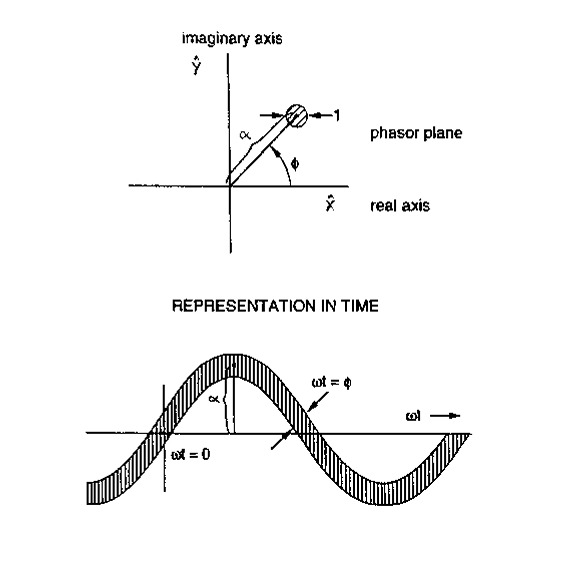
<p style="text-align: center;">
    Fig A1: Phasor and time domain representations of a coherent state
</p>

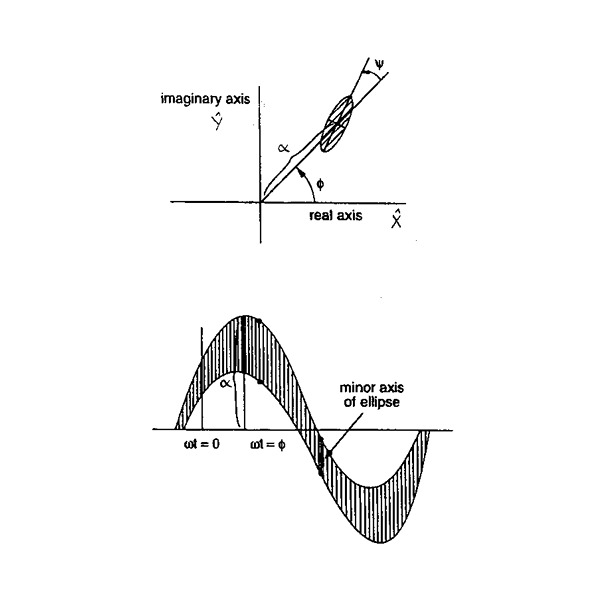
<p style="text-align: center;">
    Fig A2: Phasor and time domain representations of a squeezed state
</p>

<p style='text-align:justify;'>
Squeezed states can be generated from non-linear optical processes such as second harmonic generation, paramateric downconversion and four-wave mixing. Squeezed light has many attractive applications such as in optical communication, in precision and sensitive measurements such as gravitational wave detection, or in noise-free amplication. 
</p>
